## 📌 Notebook 1: Logistic Regression (Binary Classification)

### Handwritten Digit Recognition with Logistic Regression

This notebook introduces the first step in our learning journey: a linear binary classifier. We build **logistic regression from scratch** using PyTorch tensors to distinguish between two MNIST digits (e.g. 0 vs 1).

**Key Goals**
- Implement weights, bias, and sigmoid activation manually
- Train using binary cross-entropy loss and gradient descent
- Track training and validation accuracy and loss
- Evaluate the model using a confusion matrix

**Expected Takeaway**  
Gain a foundational understanding of how gradient-based learning works on a simple binary task.


### Loading our data 
 We will use MNIST Dataset

In [9]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)
import importlib
import src.plots 
import src.utils
importlib.reload(src.plots)



<module 'src.plots' from '/Users/mac/Studying/Machine learning/Digit_recognition_evolution/linear_classifiers/src/plots.py'>

In [10]:

from src.utils import load_transform_split_mnist , count_classes , check_device
from src.plots import  show_samples

train_loader,val_loader,test_loader , train_size,val_size, test_size = load_transform_split_mnist(classes=[0,1])

**let's show some samples**

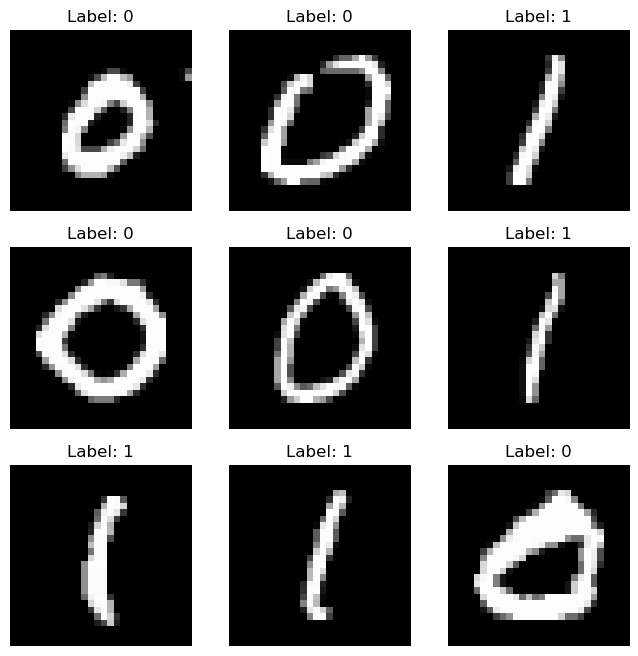

In [11]:
importlib.reload(src.plots)
show_samples(train_loader)

**checking balance**

In [12]:
# first we check on our device for function necessties
check_device()

from importlib import reload
import src.utils as utils

reload(utils)

counts = utils.count_classes(train_loader)
counts = {int(k): v for k, v in counts.items()}
print(counts)


Using Apple Silicon MPS GPU
Device: mps
{0: 4738, 1: 5394}


Our  data is not no skewed significantly 

now we explore the data shape


In [13]:
images, labels = next(iter(train_loader))

print("="*50)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("="*50)
print(images.min().item(), images.max().item())


Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
0.0 1.0


##################################################
Fitting the model to training data !!!
##################################################
##################################################
Epoch 1/150, Loss: 0.1972
##################################################
Epoch 2/150, Loss: 0.0629
##################################################
Epoch 3/150, Loss: 0.0421
##################################################
Epoch 4/150, Loss: 0.0329
##################################################
Epoch 5/150, Loss: 0.0276
##################################################
Epoch 6/150, Loss: 0.0241
##################################################
Epoch 7/150, Loss: 0.0215
##################################################
Epoch 8/150, Loss: 0.0196
##################################################
Epoch 9/150, Loss: 0.0181
##################################################
Epoch 10/150, Loss: 0.0169
##################################################
Epoch 11/150, Loss: 0.0159
##########

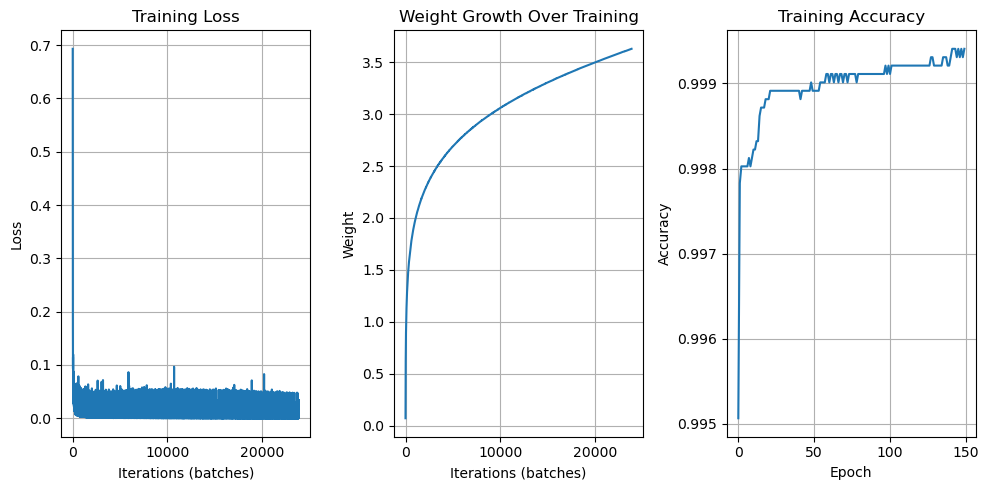

In [14]:
from src.logistic_regression_scratch import LogisticRegressionScratch
from src.plots import plot_loss_and_weights
images_flat = images.view(images.shape[0],-1)
print("#"*50)
print("Fitting the model to training data !!!")
print("#"*50)
#LRS = LogisticRegressionScratch(images_flat.shape[1])
hyper_param_tuning = {
    0.01 : 100,
    0.04 : 100,
    0.04 : 150,
    0.01 : 150,
}
best_loss = 0.5
best_epoch = 0
best_lr = 0
for lr , epochs in hyper_param_tuning.items():
    LRS = LogisticRegressionScratch(images_flat.shape[1],lr)
    loss = LRS.fit(train_loader,epochs)
    
    if(loss < best_loss):
        best_epoch = epochs
        best_lr = lr
        best_loss = loss

print("#"*50)
print("#"*50)
print(f"best params are (lr : {best_lr}, epochs : {best_epoch}) with loss : {best_loss}")

plot_loss_and_weights(LRS)




### convergence at **(lr : 0.04, epochs : 150) with loss : 0.002416705773985973**

### evaluation

In [15]:
avg_loss,acc =  LRS.evaluate(val_loader)

print(f"Validation Loss: {avg_loss:.4f}, Validation Accuracy: {acc*100:.2f}%")

Validation Loss: 0.0055, Validation Accuracy: 99.80%


### now for the testing

In [16]:
import src.utils as utils
from importlib import reload
reload(utils)



from src.utils import classification_metrics
import torch
all_preds = []
all_labels = []

for X, y in test_loader:
   
    preds = LRS.predict(X)
    all_preds.append(preds.cpu())
    all_labels.append(y.cpu())

# concatenate all batches
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

results = classification_metrics(all_labels.numpy(), all_preds.numpy())

print(results)


{'accuracy': 0.9995271867612293, 'precision': 0.9991197183098591, 'recall': 1.0, 'f1_score': 0.9995596653456627, 'confusion_matrix': array([[ 979,    1],
       [   0, 1135]])}
